In [1]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Concatenate, Input
from keras.models import load_model, load_model, Model
from keras.callbacks import ModelCheckpoint
from MCNN import MCNN
from utils import generate_generator, gen_imgPaths_and_labelPaths, monitor_mae, monitor_mse

# Settings
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
%matplotlib inline
dataset = "B"

Using TensorFlow backend.


In [2]:
# Data Import
train_paths, train_labels, validation_paths, validation_labels, test_paths, test_labels = gen_imgPaths_and_labelPaths(dataset)
for i in ['train_paths', 'train_labels', 'validation_paths', 'validation_labels', 'test_paths', 'test_labels']:
    print('len({}) ='.format(i), len(eval(i)))

./data/original/ShanghaiTech/part_B/test_data/images/
len(train_paths) = 3249
len(train_labels) = 3249
len(validation_paths) = 351
len(validation_labels) = 351
len(test_paths) = 316
len(test_labels) = 316


In [3]:
# # Model
# batch_size_train = 9
# epochs_per_iteration = 1
# batch_size_validation = 9  # len(validation_labels) // 4
# batch_size_test = 1
# train_generator = generate_generator(train_paths, train_labels, batch_size=len(train_paths))
# validation_generator = generate_generator(validation_paths, validation_labels, batch_size=len(validation_paths))
# test_generator = generate_generator(test_paths, test_labels, batch_size=len(test_paths))
# np.save('./data/train_img.npy', train_img)
# np.save('./data/train_labels.npy', train_labels)
# np.save('./data/validation_img.npy', validation_img)
# np.save('./data/validation_labels.npy', validation_labels)
# np.save('./data/test_img.npy', test_img)
# np.save('./data/test_labels.npy', test_labels)
# train_img, train_labels = train_generator.__next__()
# print('Train data reading is done.')
# validation_img, validation_labels = validation_generator.__next__()
# print('Validation data reading is done.')
# test_img, test_labels = test_generator.__next__()
# print('Test data reading is done.')

In [4]:
# Read all data into memory
train_img, train_labels, validation_img, validation_labels, test_img, test_labels = (
    np.load('./data/train_img.npy'), np.load('./data/train_labels.npy'), np.load('./data/validation_img.npy'),
    np.load('./data/validation_labels.npy'), np.load('./data/test_img.npy'), np.load('./data/test_labels.npy')
)

In [5]:
# Training
weights_dir = 'weights'
if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

checkpointer_best_val = ModelCheckpoint(
    filepath=os.path.join(weights_dir, 'mcnn_'+dataset+'_val.hdf5'),
    monitor='val_loss', verbose=1, save_best_only=True, mode='min'
)
checkpointer_best_train = ModelCheckpoint(
    filepath=os.path.join(weights_dir, 'mcnn_'+dataset+'_train.hdf5'),
    monitor='loss', verbose=1, save_best_only=True, mode='min'
)
model = MCNN()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[monitor_mae, monitor_mse])
# model = load_model('./weights/mcnn_B_val.hdf5', custom_objects={'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})
print('Training ...')
# history = model.fit_generator(
#     train_generator, steps_per_epoch=np.ceil(len(train_paths)/batch_size_train/epochs_per_iteration),
#     epochs=epochs_per_iteration*200,
#     validation_data=validation_generator, validation_steps=len(validation_labels)/batch_size_validation//2,
#     verbose=1, callbacks=[checkpointer_best]
# )
history = model.fit(
    x=train_img, y=train_labels, batch_size=1, epochs=200,
    validation_data=(validation_img, validation_labels),
    callbacks=[checkpointer_best_val, checkpointer_best_train]
)

Training ...
Train on 3249 samples, validate on 351 samples
Epoch 1/200
3249/3249 [==============================] - 30s 9ms/step - loss: 2.2008e-04 - monitor_mae: 12.6896 - monitor_mse: 0.6761 - val_loss: 1.3140e-04 - val_monitor_mae: 7.9366 - val_monitor_mse: 0.4037

Epoch 00001: val_loss improved from inf to 0.00013, saving model to weights\mcnn_B_val.hdf5

Epoch 00001: loss improved from inf to 0.00022, saving model to weights\mcnn_B_train.hdf5
Epoch 2/200
3249/3249 [==============================] - 28s 9ms/step - loss: 2.0963e-04 - monitor_mae: 12.0145 - monitor_mse: 0.6440 - val_loss: 1.3182e-04 - val_monitor_mae: 7.5379 - val_monitor_mse: 0.4049

Epoch 00002: val_loss did not improve from 0.00013

Epoch 00002: loss improved from 0.00022 to 0.00021, saving model to weights\mcnn_B_train.hdf5
Epoch 3/200
3249/3249 [==============================] - 27s 8ms/step - loss: 1.9910e-04 - monitor_mae: 11.4347 - monitor_mse: 0.6116 - val_loss: 1.2331e-04 - val_monitor_mae: 7.5942 - val_mo


Epoch 00023: loss improved from 0.00014 to 0.00013, saving model to weights\mcnn_B_train.hdf5
Epoch 24/200
3249/3249 [==============================] - 27s 8ms/step - loss: 1.3328e-04 - monitor_mae: 8.6346 - monitor_mse: 0.4094 - val_loss: 1.0807e-04 - val_monitor_mae: 8.0227 - val_monitor_mse: 0.3320

Epoch 00024: val_loss did not improve from 0.00010

Epoch 00024: loss did not improve from 0.00013
Epoch 25/200
3249/3249 [==============================] - 27s 8ms/step - loss: 1.2596e-04 - monitor_mae: 8.3057 - monitor_mse: 0.3869 - val_loss: 1.0407e-04 - val_monitor_mae: 7.9999 - val_monitor_mse: 0.3197

Epoch 00025: val_loss did not improve from 0.00010

Epoch 00025: loss improved from 0.00013 to 0.00013, saving model to weights\mcnn_B_train.hdf5
Epoch 26/200
3249/3249 [==============================] - 27s 8ms/step - loss: 1.2013e-04 - monitor_mae: 8.1614 - monitor_mse: 0.3690 - val_loss: 1.1711e-04 - val_monitor_mae: 12.8399 - val_monitor_mse: 0.3598

Epoch 00026: val_loss did not

3249/3249 [==============================] - 27s 8ms/step - loss: 9.6040e-05 - monitor_mae: 7.0383 - monitor_mse: 0.2950 - val_loss: 1.0648e-04 - val_monitor_mae: 6.6384 - val_monitor_mse: 0.3271

Epoch 00048: val_loss did not improve from 0.00010

Epoch 00048: loss did not improve from 0.00010
Epoch 49/200
3249/3249 [==============================] - 27s 8ms/step - loss: 9.2788e-05 - monitor_mae: 6.7898 - monitor_mse: 0.2850 - val_loss: 1.1000e-04 - val_monitor_mae: 6.4319 - val_monitor_mse: 0.3379

Epoch 00049: val_loss did not improve from 0.00010

Epoch 00049: loss improved from 0.00010 to 0.00009, saving model to weights\mcnn_B_train.hdf5
Epoch 50/200
3249/3249 [==============================] - 27s 8ms/step - loss: 1.1173e-04 - monitor_mae: 7.5965 - monitor_mse: 0.3432 - val_loss: 1.0881e-04 - val_monitor_mae: 5.4952 - val_monitor_mse: 0.3342

Epoch 00050: val_loss did not improve from 0.00010

Epoch 00050: loss did not improve from 0.00009
Epoch 51/200
3249/3249 [===============

3249/3249 [==============================] - 27s 8ms/step - loss: 8.2139e-05 - monitor_mae: 6.3617 - monitor_mse: 0.2523 - val_loss: 1.1113e-04 - val_monitor_mae: 5.5240 - val_monitor_mse: 0.3414

Epoch 00073: val_loss did not improve from 0.00010

Epoch 00073: loss did not improve from 0.00008
Epoch 74/200
3249/3249 [==============================] - 27s 8ms/step - loss: 8.0028e-05 - monitor_mae: 6.1703 - monitor_mse: 0.2458 - val_loss: 1.1342e-04 - val_monitor_mae: 5.5083 - val_monitor_mse: 0.3484

Epoch 00074: val_loss did not improve from 0.00010

Epoch 00074: loss improved from 0.00008 to 0.00008, saving model to weights\mcnn_B_train.hdf5
Epoch 75/200
3249/3249 [==============================] - 27s 8ms/step - loss: 8.3016e-05 - monitor_mae: 6.3527 - monitor_mse: 0.2550 - val_loss: 1.1929e-04 - val_monitor_mae: 5.9965 - val_monitor_mse: 0.3665

Epoch 00075: val_loss did not improve from 0.00010

Epoch 00075: loss did not improve from 0.00008
Epoch 76/200
3249/3249 [===============

3249/3249 [==============================] - 27s 8ms/step - loss: 7.5116e-05 - monitor_mae: 5.7153 - monitor_mse: 0.2308 - val_loss: 1.1990e-04 - val_monitor_mae: 6.4273 - val_monitor_mse: 0.3683

Epoch 00099: val_loss did not improve from 0.00010

Epoch 00099: loss did not improve from 0.00007
Epoch 100/200
3249/3249 [==============================] - 27s 8ms/step - loss: 7.3968e-05 - monitor_mae: 6.0828 - monitor_mse: 0.2272 - val_loss: 1.2124e-04 - val_monitor_mae: 8.8575 - val_monitor_mse: 0.3725

Epoch 00100: val_loss did not improve from 0.00010

Epoch 00100: loss did not improve from 0.00007
Epoch 101/200
3249/3249 [==============================] - 27s 8ms/step - loss: 7.3893e-05 - monitor_mae: 5.8035 - monitor_mse: 0.2270 - val_loss: 1.1921e-04 - val_monitor_mae: 7.7129 - val_monitor_mse: 0.3662

Epoch 00101: val_loss did not improve from 0.00010

Epoch 00101: loss did not improve from 0.00007
Epoch 102/200
3249/3249 [==============================] - 27s 8ms/step - loss: 7.98

3249/3249 [==============================] - 27s 8ms/step - loss: 7.5897e-05 - monitor_mae: 5.8230 - monitor_mse: 0.2332 - val_loss: 1.1658e-04 - val_monitor_mae: 5.6284 - val_monitor_mse: 0.3581

Epoch 00125: val_loss did not improve from 0.00010

Epoch 00125: loss did not improve from 0.00007
Epoch 126/200
3249/3249 [==============================] - 27s 8ms/step - loss: 6.6556e-05 - monitor_mae: 5.4562 - monitor_mse: 0.2045 - val_loss: 1.1353e-04 - val_monitor_mae: 6.4007 - val_monitor_mse: 0.3488

Epoch 00126: val_loss did not improve from 0.00010

Epoch 00126: loss improved from 0.00007 to 0.00007, saving model to weights\mcnn_B_train.hdf5
Epoch 127/200
3249/3249 [==============================] - 27s 8ms/step - loss: 7.1590e-05 - monitor_mae: 5.7221 - monitor_mse: 0.2199 - val_loss: 1.2190e-04 - val_monitor_mae: 5.8562 - val_monitor_mse: 0.3745

Epoch 00127: val_loss did not improve from 0.00010

Epoch 00127: loss did not improve from 0.00007
Epoch 128/200
3249/3249 [============

3249/3249 [==============================] - 27s 8ms/step - loss: 7.0505e-05 - monitor_mae: 5.7337 - monitor_mse: 0.2166 - val_loss: 1.2092e-04 - val_monitor_mae: 6.5689 - val_monitor_mse: 0.3715

Epoch 00151: val_loss did not improve from 0.00010

Epoch 00151: loss did not improve from 0.00006
Epoch 152/200
3249/3249 [==============================] - 27s 8ms/step - loss: 6.3434e-05 - monitor_mae: 5.2880 - monitor_mse: 0.1949 - val_loss: 1.1888e-04 - val_monitor_mae: 7.5895 - val_monitor_mse: 0.3652

Epoch 00152: val_loss did not improve from 0.00010

Epoch 00152: loss improved from 0.00006 to 0.00006, saving model to weights\mcnn_B_train.hdf5
Epoch 153/200
3249/3249 [==============================] - 27s 8ms/step - loss: 6.5554e-05 - monitor_mae: 5.5039 - monitor_mse: 0.2014 - val_loss: 1.1663e-04 - val_monitor_mae: 7.9841 - val_monitor_mse: 0.3583

Epoch 00153: val_loss did not improve from 0.00010

Epoch 00153: loss did not improve from 0.00006
Epoch 154/200
3249/3249 [============

3249/3249 [==============================] - 27s 8ms/step - loss: 7.4272e-05 - monitor_mae: 5.7226 - monitor_mse: 0.2282 - val_loss: 1.2171e-04 - val_monitor_mae: 5.6835 - val_monitor_mse: 0.3739

Epoch 00177: val_loss did not improve from 0.00010

Epoch 00177: loss did not improve from 0.00006
Epoch 178/200
3249/3249 [==============================] - 27s 8ms/step - loss: 6.4964e-05 - monitor_mae: 5.3900 - monitor_mse: 0.1996 - val_loss: 1.2133e-04 - val_monitor_mae: 6.0935 - val_monitor_mse: 0.3727

Epoch 00178: val_loss did not improve from 0.00010

Epoch 00178: loss did not improve from 0.00006
Epoch 179/200
3249/3249 [==============================] - 28s 8ms/step - loss: 7.3611e-05 - monitor_mae: 5.7626 - monitor_mse: 0.2261 - val_loss: 1.1990e-04 - val_monitor_mae: 5.9065 - val_monitor_mse: 0.3683

Epoch 00179: val_loss did not improve from 0.00010

Epoch 00179: loss did not improve from 0.00006
Epoch 180/200
3249/3249 [==============================] - 27s 8ms/step - loss: 6.17

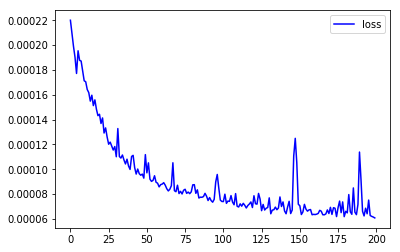

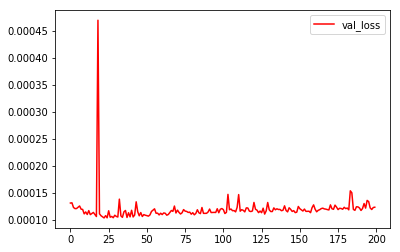

In [6]:
val_loss, loss = history.history['val_loss'], history.history['loss']
loss = np.asarray(loss)
# loss[loss > 0.0002] = 0.0002
plt.plot(loss, 'b')
plt.legend(['loss'])
plt.show()
plt.plot(val_loss, 'r')
plt.legend(['val_loss'])
plt.show()

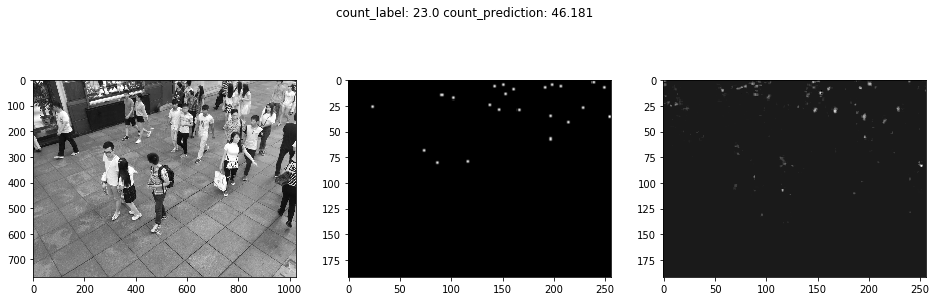

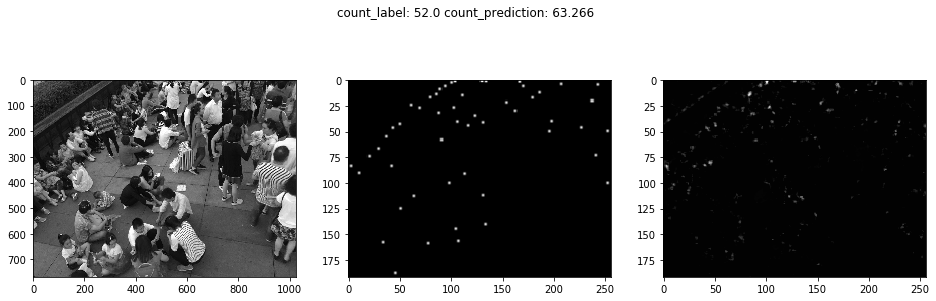

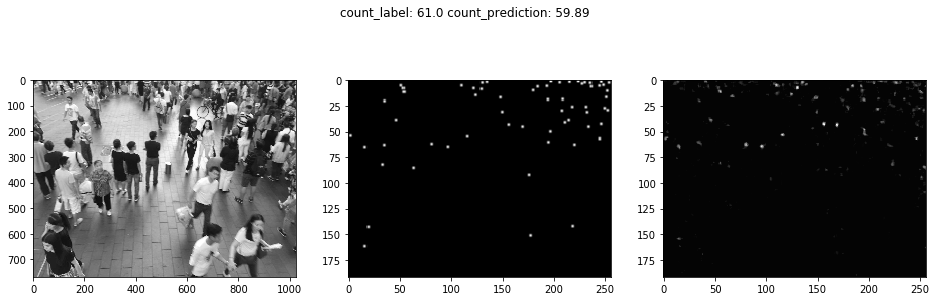

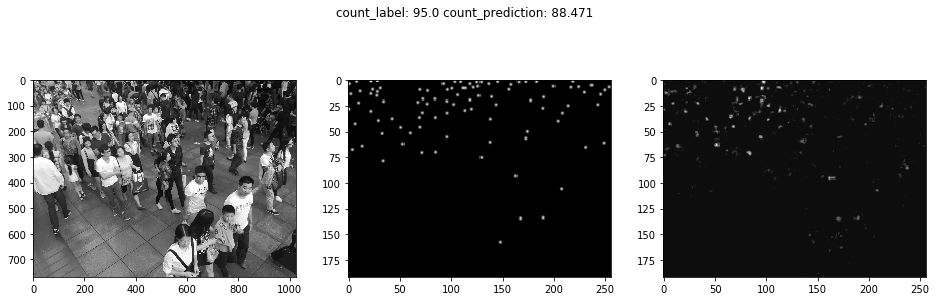

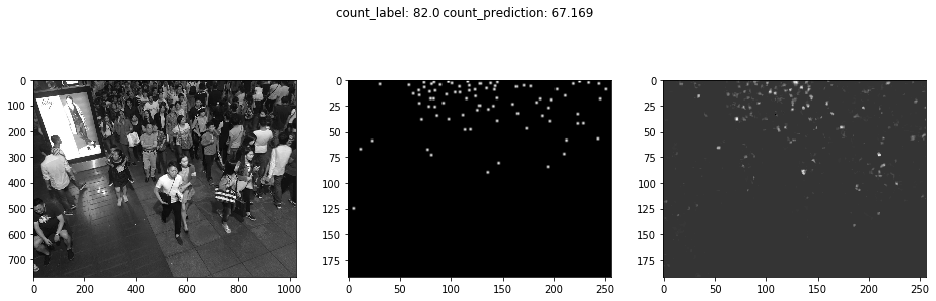

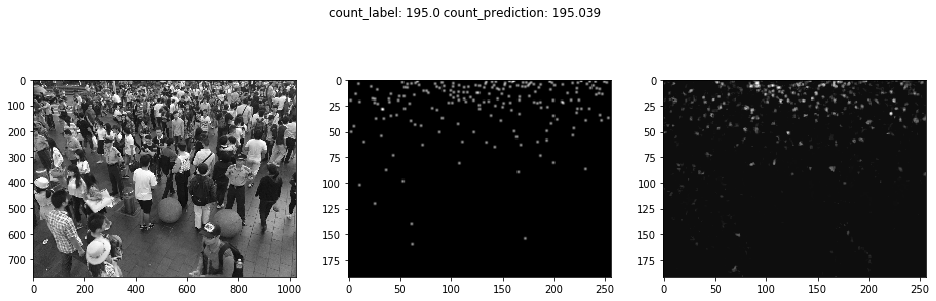

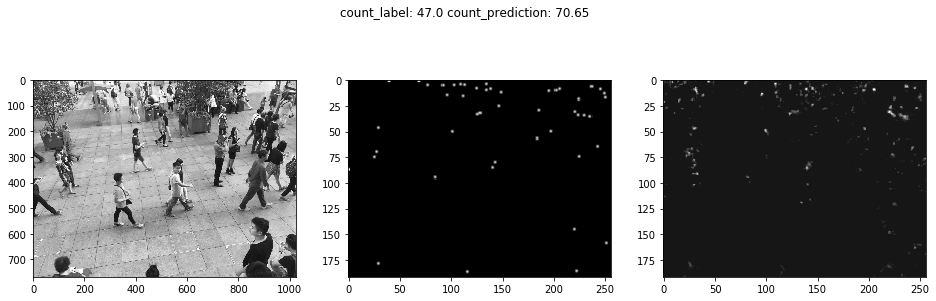

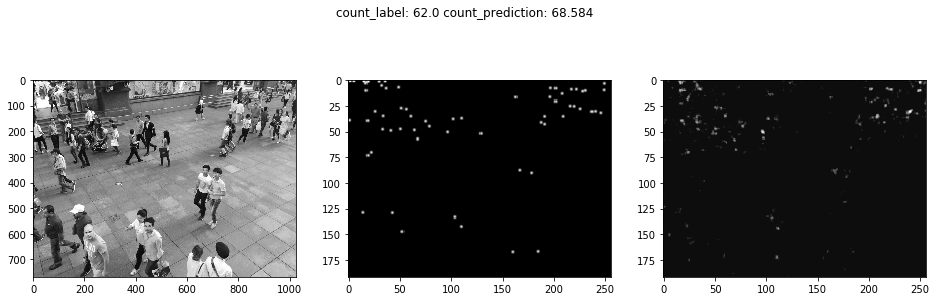

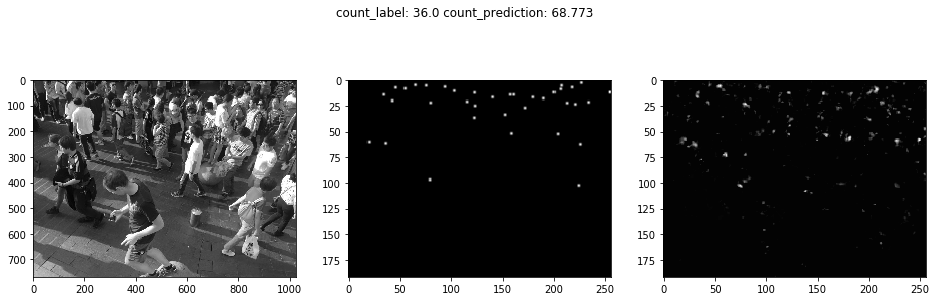

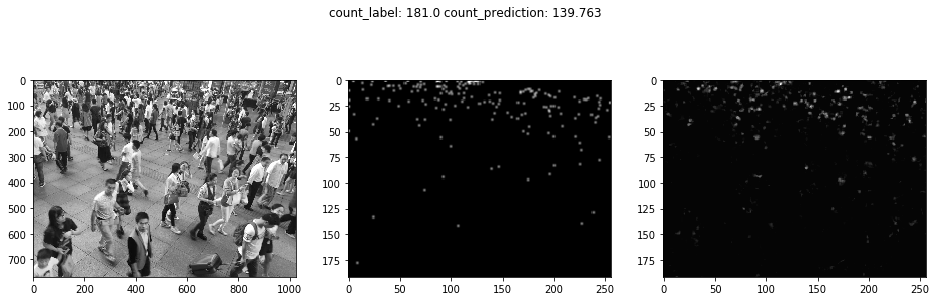

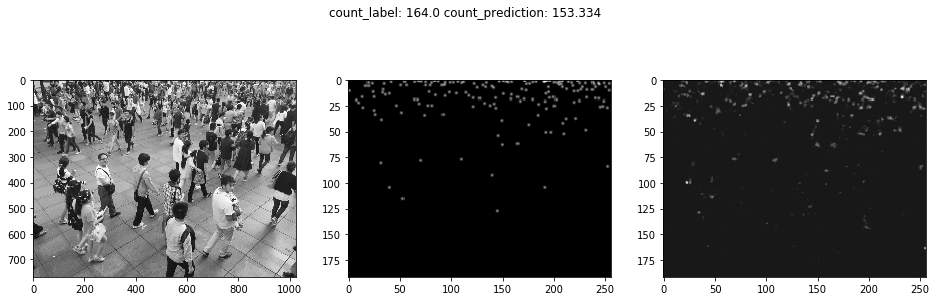

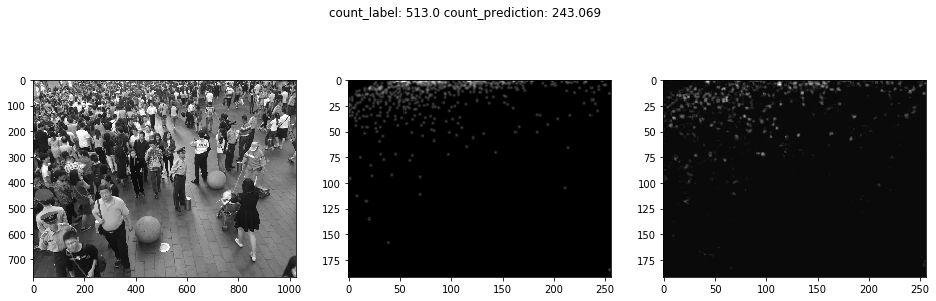

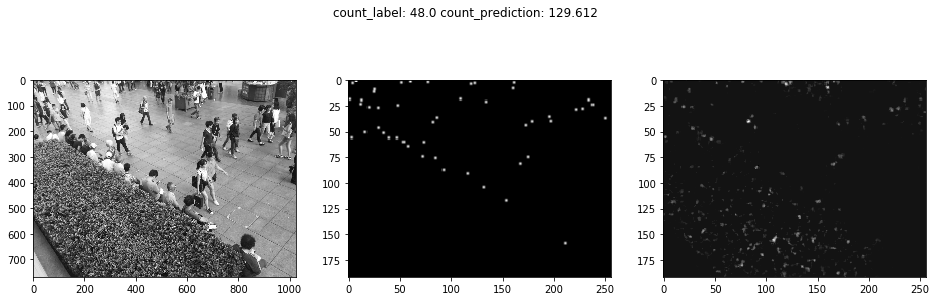

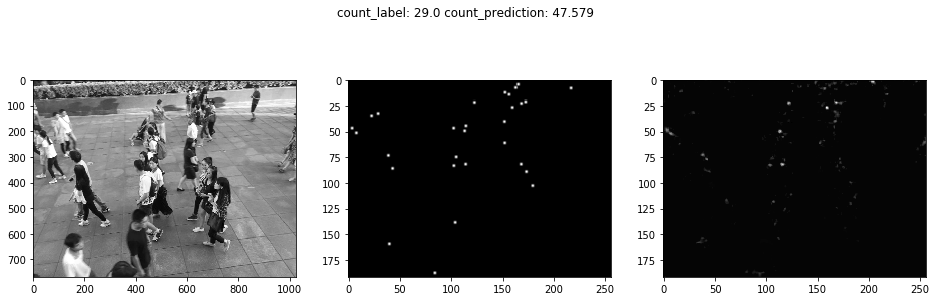

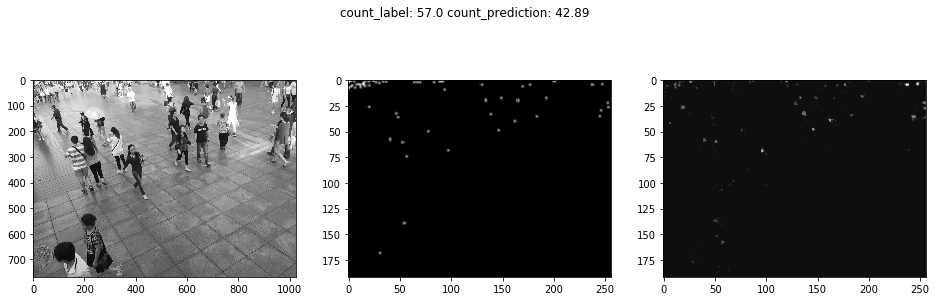

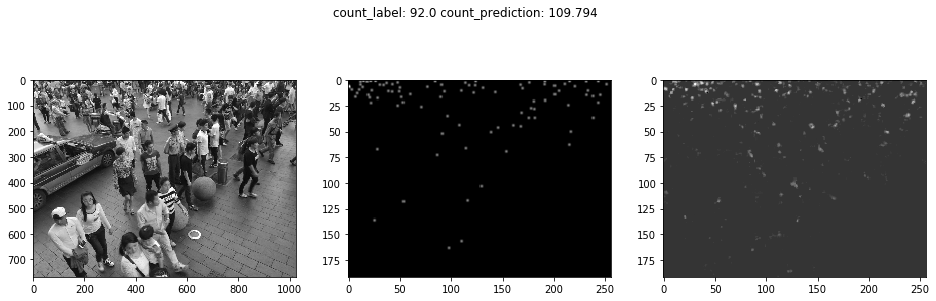

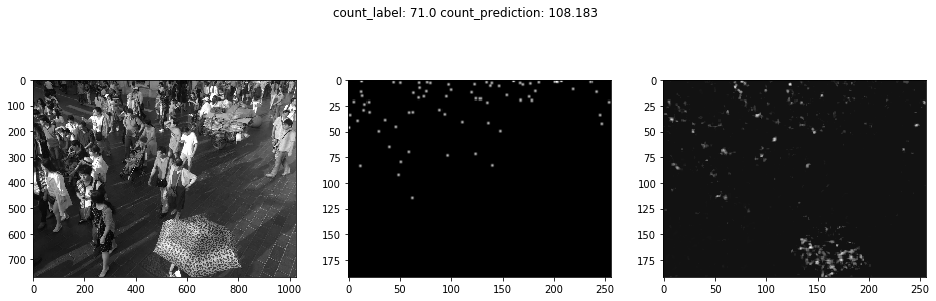

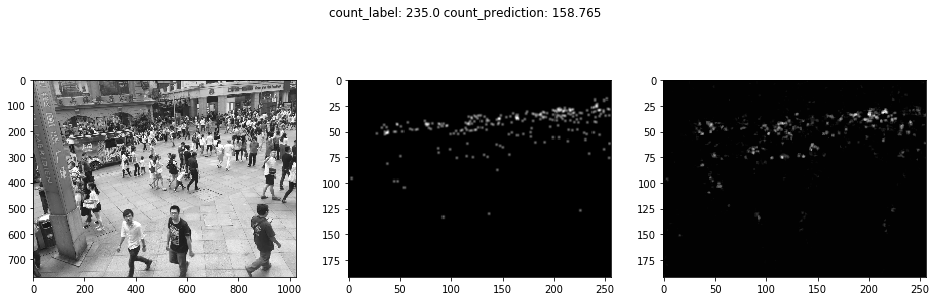

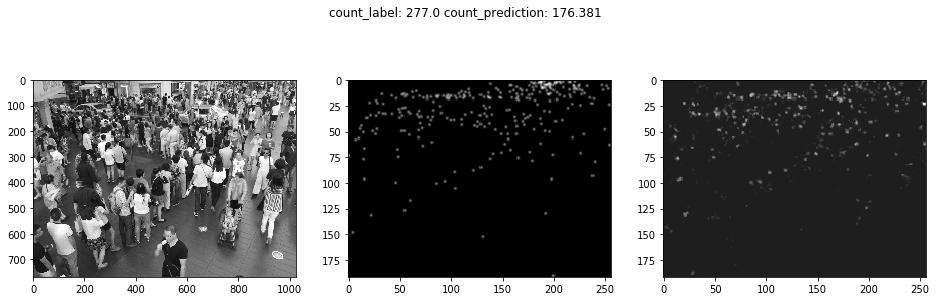

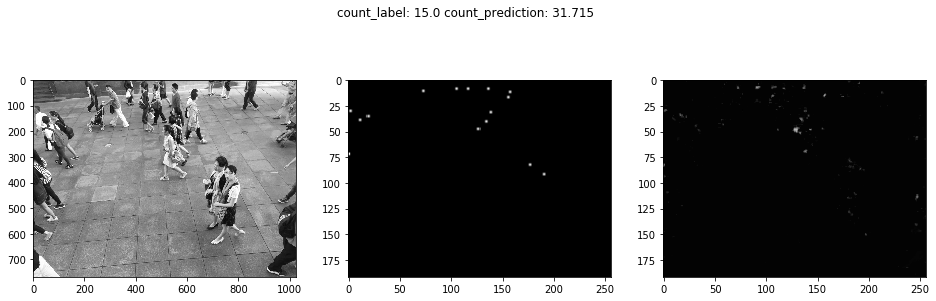

mae: 40.23227767944335 mse: 5120.05756819563


In [16]:
# model = load_model('../Multi_column_CNN/weights/mcnn_B.hdf5', custom_objects={'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})
ae = []
se = []
num_test = 20
for i in range(test_img.shape[0])[:num_test]:
    inputs = np.reshape(test_img[i], [1, *test_img[i].shape[:2], 1])
    outputs = np.squeeze(model.predict(inputs))
#     outputs[outputs < np.mean(outputs)] = 0
    density_map = np.squeeze(test_labels[i])
    count_label = np.sum(density_map)
    count_prediction = np.sum(outputs)
    fg, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 5))
    plt.suptitle(' '.join([
        'count_label:', str(round(count_label, 3)),
        'count_prediction:', str(round(count_prediction, 3))
    ]))
    ax0.imshow(np.squeeze(inputs), cmap='gray')
    ax1.imshow(density_map * (255 / (np.max(density_map) - np.min(density_map))), cmap='gray')
    ax2.imshow(outputs * (255 / (np.max(outputs) - np.min(outputs))), cmap='gray')
    plt.show()
    ae.append(abs(count_label - count_prediction))
    se.append((count_label - count_prediction) ** 2)
mae = np.mean(ae)
mse = np.mean(se)
print('mae:', mae, 'mse:', mse)